In [49]:
#輸出圖檔名、圖檔大小############
figure_name = "NPC_UMAP_default_result"
kmeans_figure_name = "NPC_kmeans_default_result"
dot_size = 3
length, width = 12, 8
n_neighbors = 15
min_dist = 0.1
n_components = 2
metric = 'euclidean'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
data = pd.read_excel("./GTEx_NPC_data.xlsx", engine='openpyxl', header = None, index_col=0)
data = data.to_numpy()
label_data = pd.read_excel("./GTEx_NPC_data.xlsx", engine='openpyxl', header = None, index_col=None, usecols = "A")
label_data = label_data.to_numpy().flatten()

In [25]:
row_sums = data.sum(axis=1)
normalize_data = data / row_sums[:, np.newaxis]

#### UMAP參數修改

In [26]:
umap_x = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, metric=metric).fit_transform(normalize_data)

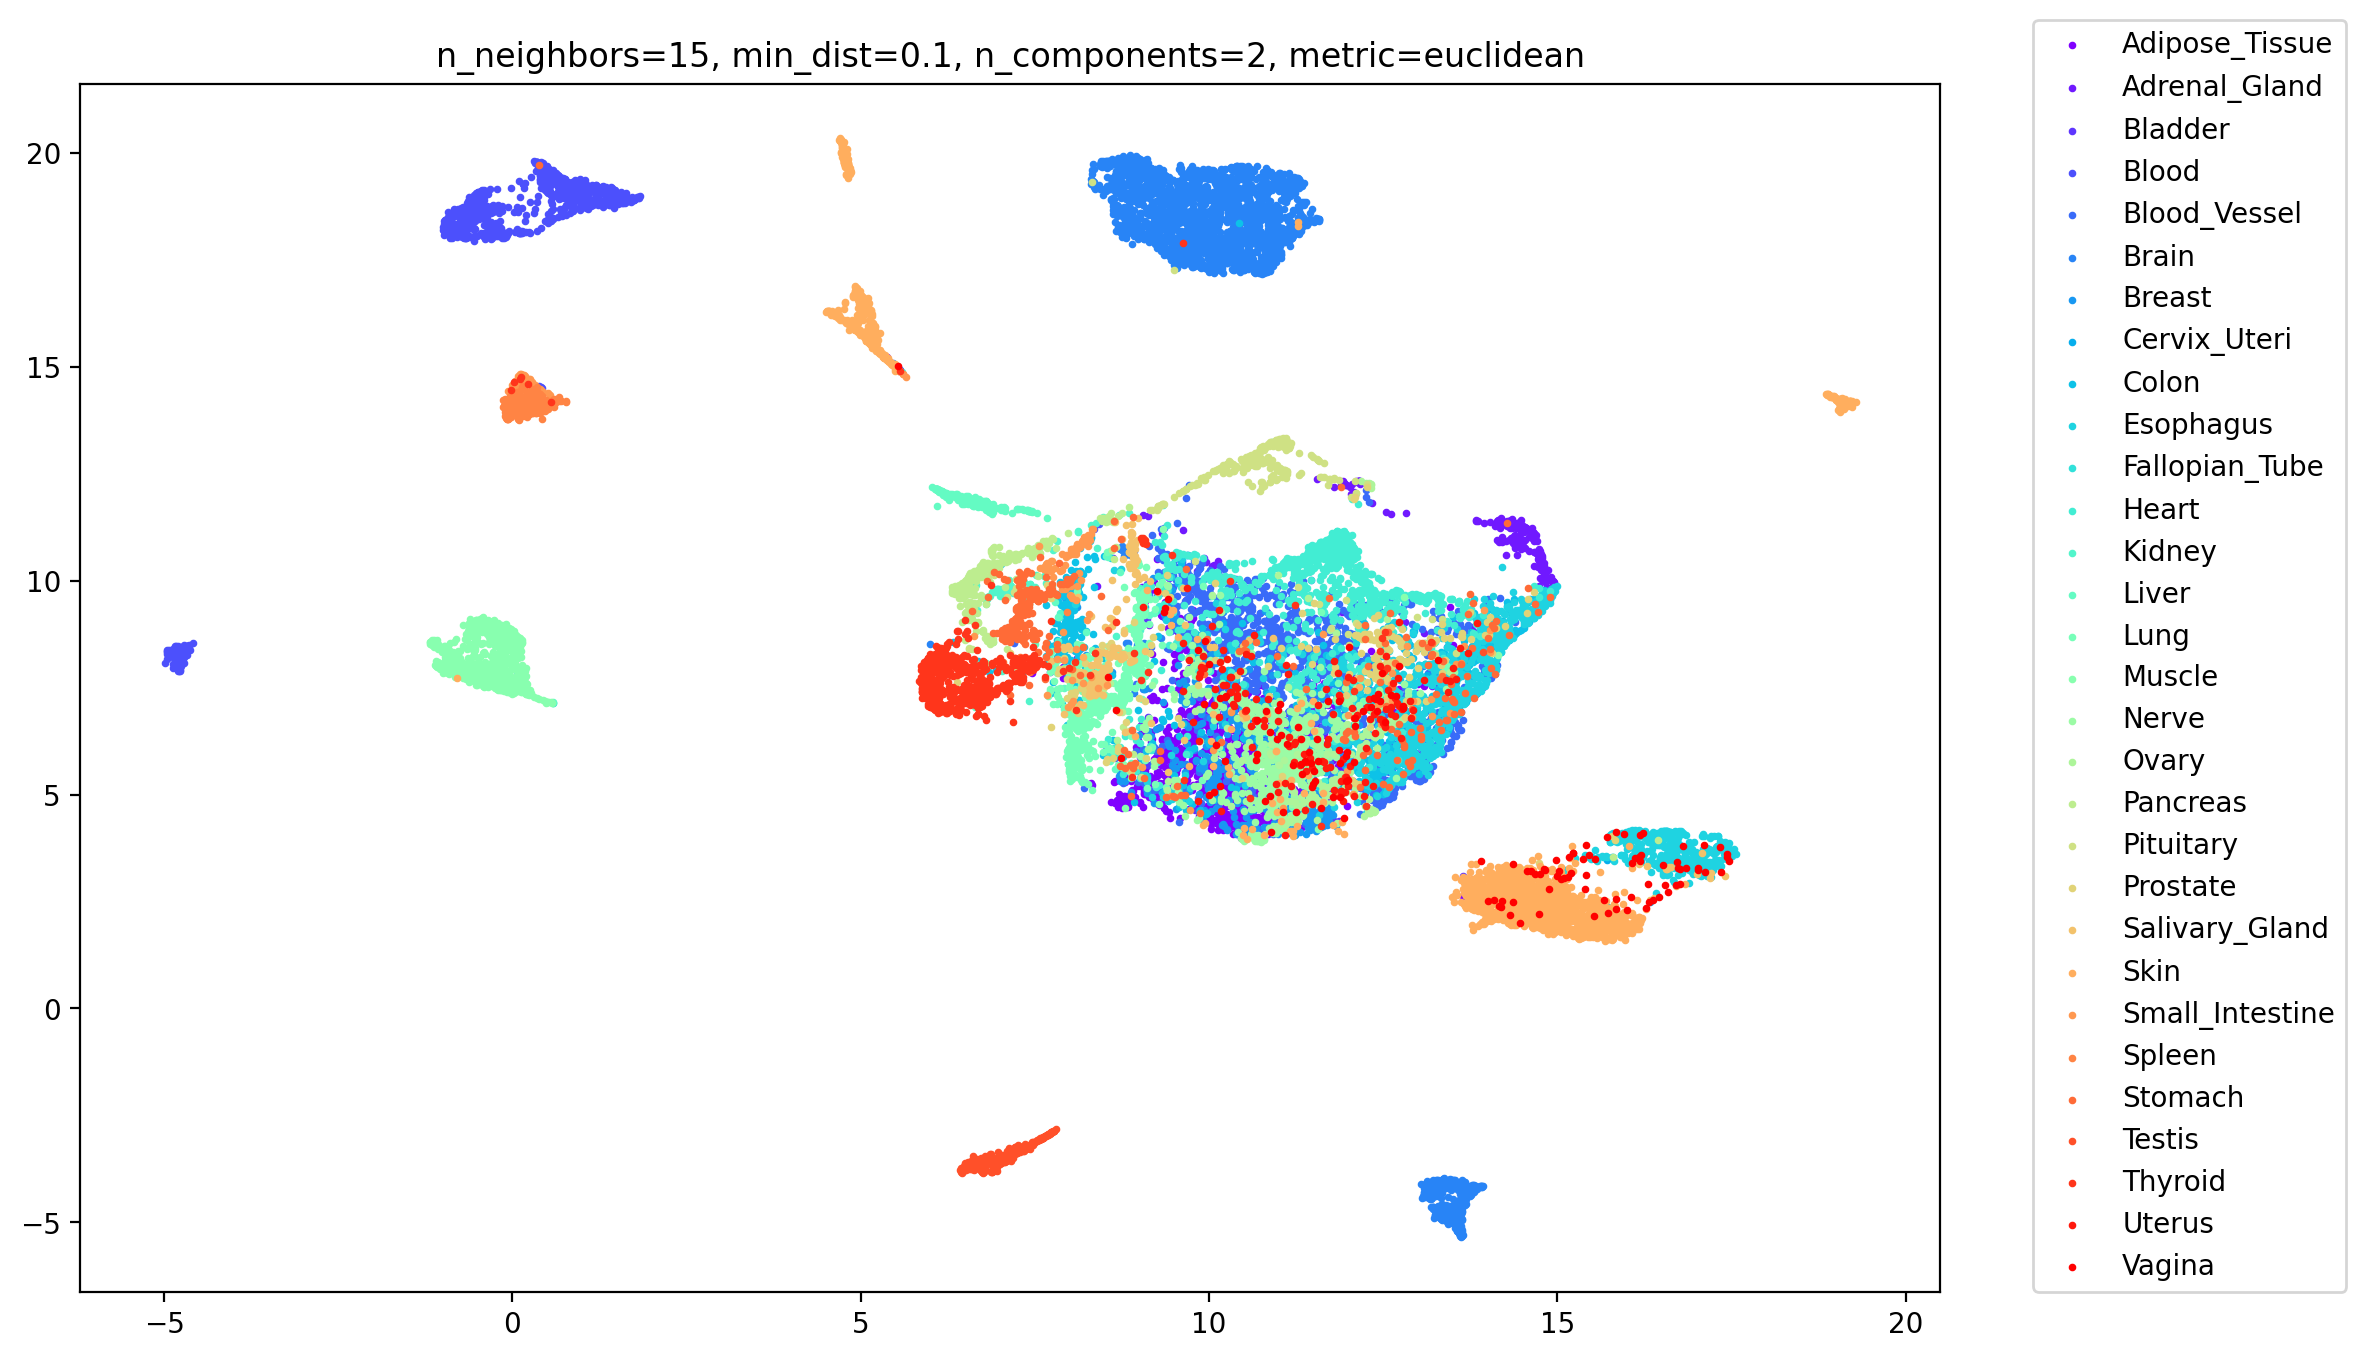

In [27]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

number = np.unique(label_data).shape[0]
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
color_dic = {}
cancers = np.unique(label_data).tolist()
for i in range(number):
    color_dic[cancers[i]] = colors[i]

x_dot = umap_x[:,0]
y_dot = umap_x[:,1]
fig, ax = plt.subplots(figsize=(length, width),dpi=200)
for g in np.unique(label_data):
	ix = np.where(label_data == g)
	ax.scatter(x_dot[ix], y_dot[ix], c = color_dic[g], label = g, s = dot_size)
ax.set_title('n_neighbors=' + str(n_neighbors) + ', min_dist=' + str(min_dist) + ', n_components=' + str(n_components) + ', metric=' + metric)
ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

plt.savefig("./result/%s.jpg" % figure_name, dpi=300, bbox_inches = 'tight')

In [28]:
dx = pd.DataFrame(x_dot, columns=['x'])
dy = pd.DataFrame(y_dot, columns=['y'])
df = pd.concat((dx, dy), axis=1)
df

x         y
0      -0.616320  8.002126
1      -0.125459  7.659206
2      -0.228528  9.003065
3      -0.381775  8.905993
4       0.037402  7.469656
...          ...       ...
17377  12.317025  4.569963
17378  12.206165  6.141832
17379  11.768585  4.817064
17380  12.787598  6.771352
17381  11.238955  4.815210

[17382 rows x 2 columns]

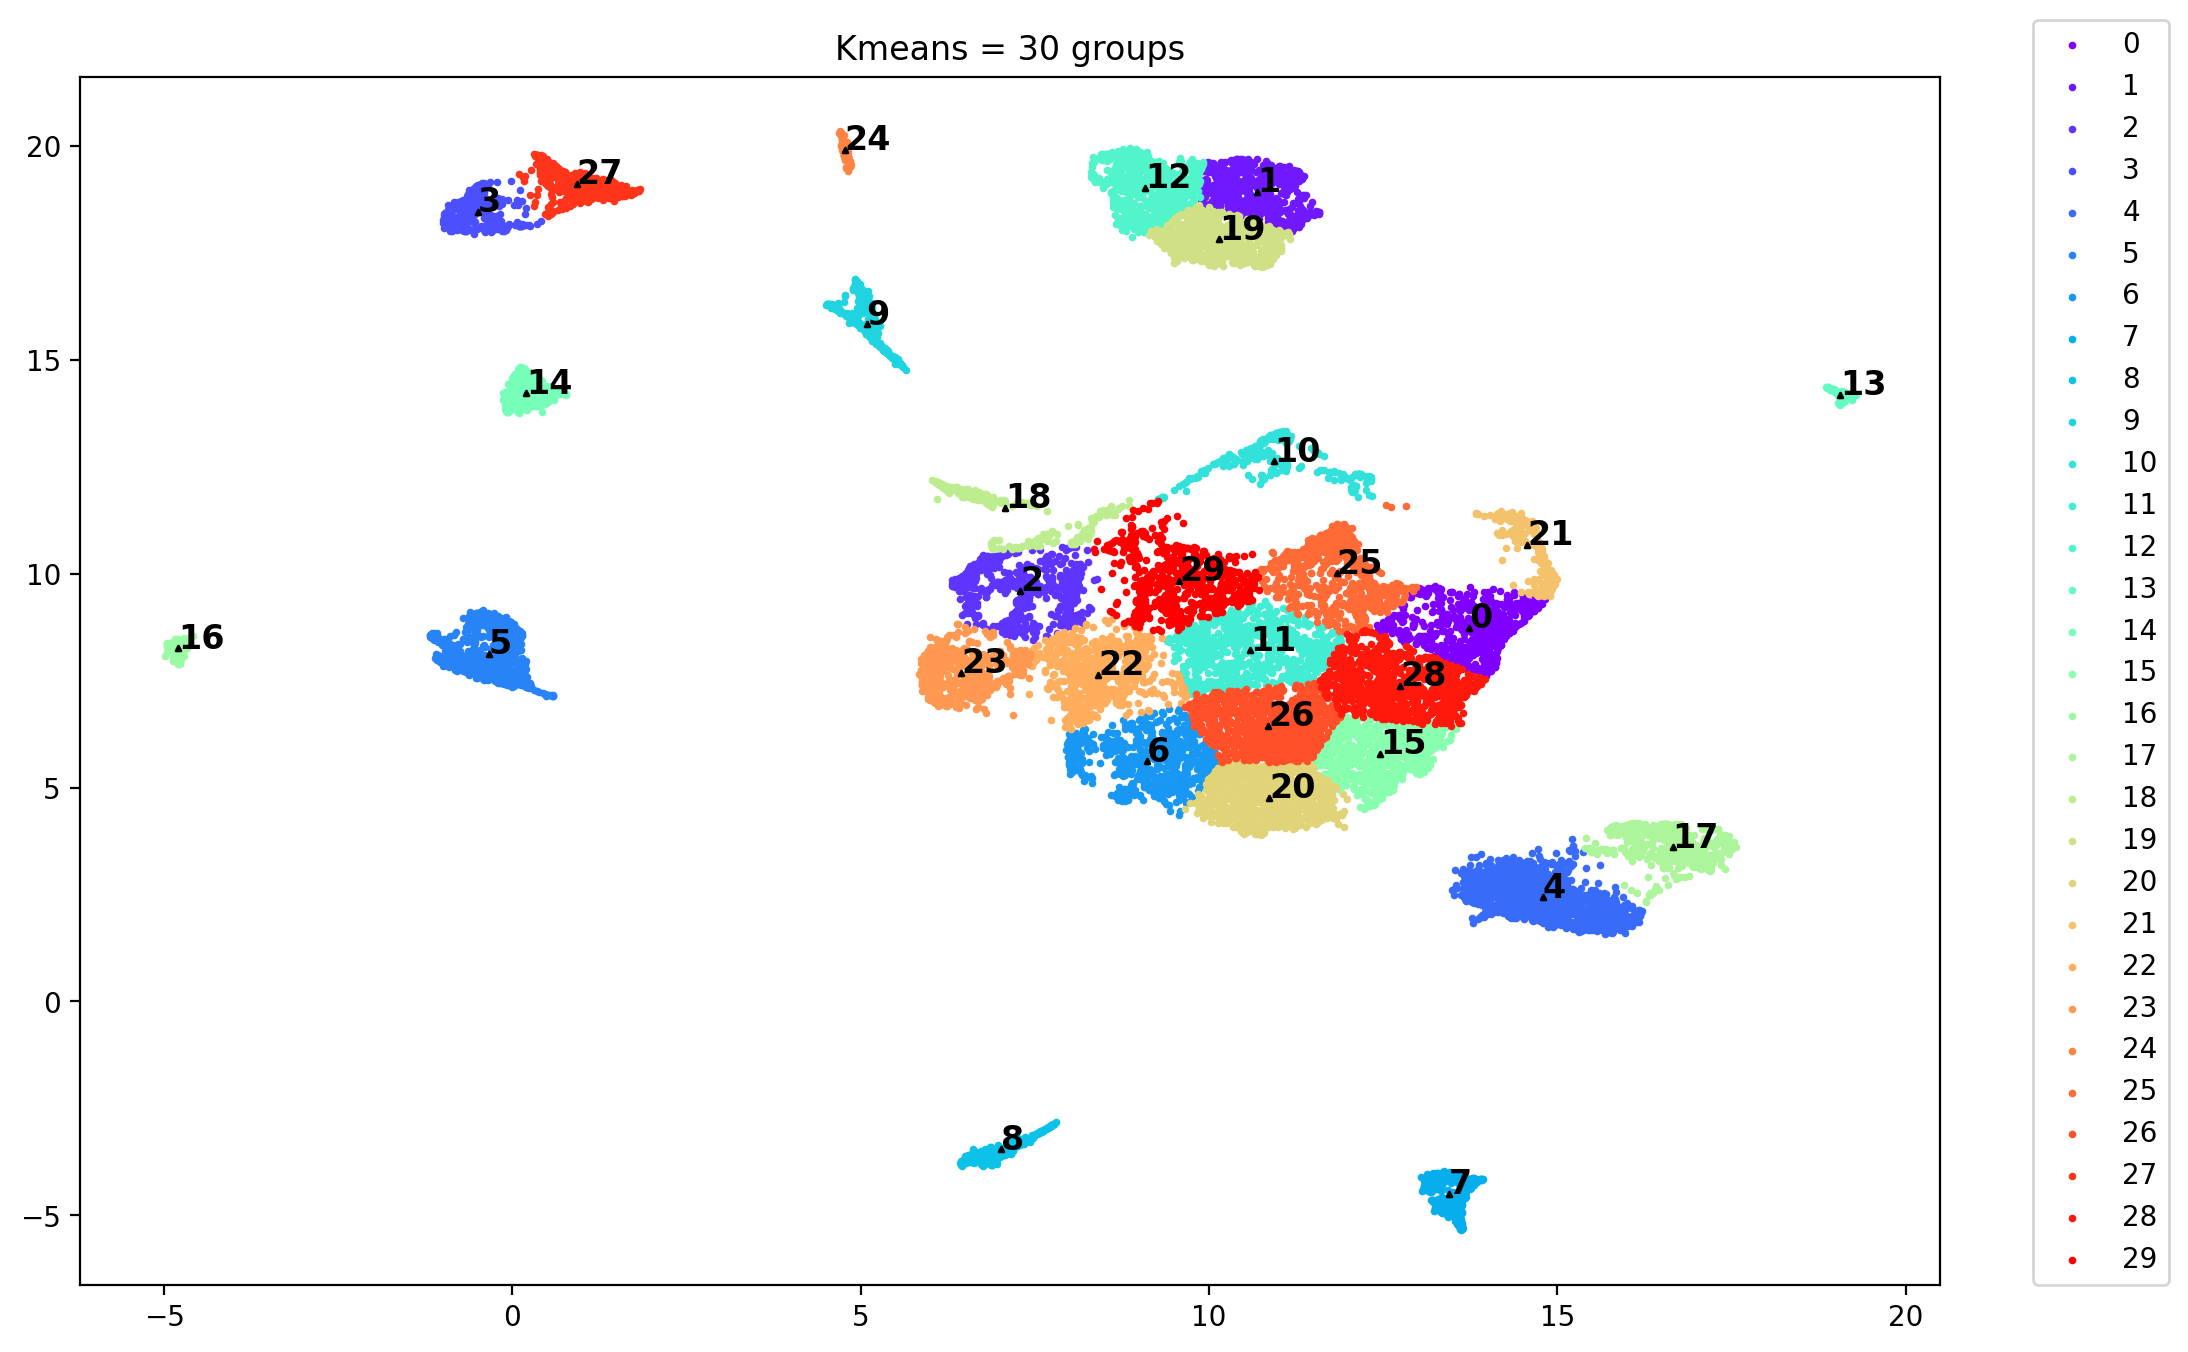

In [61]:
# 總共有30種tissues
kmeans = KMeans(n_clusters=30).fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# 分類的有效性
silhouette_avg = silhouette_score(df, labels)
# print(silhouette_avg)
# 印出kmeans結果
fig, ax = plt.subplots(figsize=(length, width),dpi=200)
for i,g in zip(range(30),np.unique(label_data)):
	ax.scatter(df[labels==i].x, df[labels==i].y, c = color_dic[g], label = i, s = dot_size)
plt.scatter(centers.T[0], centers.T[1], c='black', marker='^', s=dot_size)
for j in range(centers.shape[0]):
    plt.text(centers.T[0][j], centers.T[1][j], str(j), fontdict={'color': 'black', 'weight': 'bold', 'size': 12})
ax.set_title("Kmeans = 30 groups")
ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.savefig("./result/%s.jpg" % kmeans_figure_name, dpi=300, bbox_inches = 'tight')

In [95]:
df_centers = pd.DataFrame(centers, columns=['x','y'])
df_labels = pd.DataFrame(labels.T, columns=['labels'])
df_label_data = pd.DataFrame(label_data.T, columns=['labels'])
df_all = pd.concat((df,df_label_data,df_labels), axis=1)

KeyboardInterrupt: 